In [1]:
from importlib import reload 
import BWTEK

In [2]:
BWTEK=reload(BWTEK)

In [3]:
pwd

'D:\\winpython3.7\\WPy64-37120\\notebooks\\MChD-python\\src\\mchd_python'

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
inst=BWTEK.spectrometer()

inst.integrationTime(20)

inst.readEEPROM()

inst.readConfig()
inst.config['COMMON']['model']

Found 1 spectrometers , initialized 1


'BTC112E'

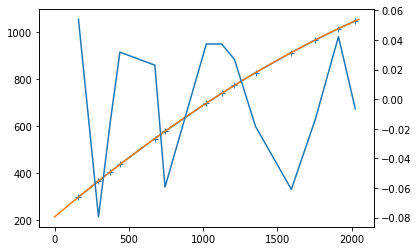

In [6]:
#check interpolation vs calibration points
x=[]
y=[]
for point in inst.config.items('CALIBRATION'):
    a,b=[float(x) for x in point[1].split(';')]
    y.append(a/10)
    x.append(b)
plot(x,y,'-+')
x1=arange(2050)
plot(x1,inst.getInterpolate()(x1))
twinx()
plot(x,y-inst.getInterpolate()(x))

In [7]:
inst.getInterpolate()(843)

620.7522416077725

(619.8826591581818, 'nm')

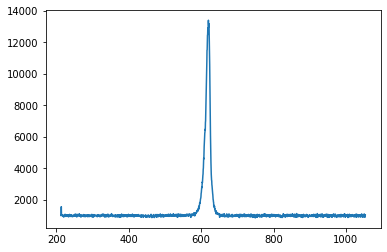

In [8]:
sp=inst.readSpectrum()
plot(inst.wavelengths,sp)
inst.getInterpolate()(argmax(sp)),'nm'

In [10]:
%timeit inst.readSpectrum()

26.1 ms ± 675 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Test spectrometer timing

In [11]:
from timeit import repeat,timeit

In [13]:
rs0=[]
x=array((5,10,15,20,30,40,60,100))
for i in x:
    print(f"timing for {i}")
    inst.integrationTime(i)
    res=repeat(stmt=inst.readSpectrum,number=20)
    print(res)
    rs0.append(res)
rs0=array(rs0)    

timing for 5
[0.20551524492734075, 0.20368842543177834, 0.20594068805596066, 0.20371109683915734, 0.20679015735021267, 0.2029239739151194, 0.20340113619175781]
timing for 10
[0.3024305519885502, 0.306558873571106, 0.32026232235270413, 0.3113099503744081, 0.3101912581178681, 0.3330621030068244, 0.3178655295066619]
timing for 15
[0.42247529967880837, 0.4181546253744841, 0.42062616301663525, 0.41484212021586586, 0.40711364999384614, 0.42724833940798135, 0.42873579627473646]
timing for 20
[0.5078285432310281, 0.5248267851342234, 0.5125700555343258, 0.5118038328139676, 0.5083960368963005, 0.5203484737006363, 0.5058741970690619]
timing for 30
[0.7261984761271947, 0.7335836870722403, 0.7066089632117496, 0.7042876236433244, 0.711503507514692, 0.71188927568042, 0.710336638517532]
timing for 40
[0.9114224572334138, 0.9099183510518856, 0.9122687383609787, 0.9105379181059163, 0.9233458462970816, 0.9061743806720699, 0.9140555286529377]
timing for 60
[1.3260003138572927, 1.308968419083783, 1.3090750

array([0.00101162, 0.00540831])

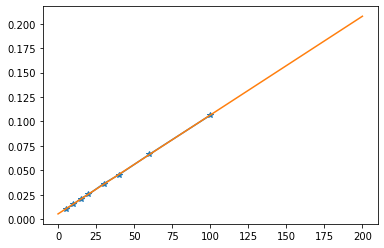

In [14]:

y=[mean(y[0])/20 for y in rs0]
plot(x,y,'-*')
np.polyfit(x,y, 1)
z=np.polyfit(x,y, 1)
plot([0,200],[z[1],z[0]*200+z[1]])
z

In [15]:
rs=[]
x=array((5,10,15,20,30,40,60,100,150,200))
for i in x:
    print(f"timing for {i}")
    inst.integrationTime(i)
    res=repeat(stmt=inst.readSpectrumTTL,number=20)
    print(res)
    rs.append(res)
rs=array(rs)    

timing for 5
[0.21616655549411234, 0.2245425777886112, 0.22041177652084798, 0.23978378562202352, 0.27692096782820386, 0.22566162428591952, 0.22929825972150297]
timing for 10
[0.331755663158134, 0.3310680818820231, 0.33480850985446864, 0.352768161125681, 0.35125944981456314, 0.33020338023598583, 0.3617984660667446]
timing for 15
[0.5464326363410521, 0.4714331411340993, 0.4849959563419475, 0.502564171595651, 0.42328119736203007, 0.41687121117388415, 0.44945321170592933]
timing for 20
[0.6207218788645434, 0.5256468524470392, 0.5392578443955074, 0.5204749376447921, 0.536890453530873, 0.518535823834668, 0.5641737210758038]
timing for 30
[0.7387818156892365, 0.716603511446749, 0.7158741297633355, 0.7391268461698814, 0.7257252104987231, 0.7206106826963037, 0.7262629479418479]
timing for 40
[0.9276342846940793, 0.9287065714136986, 0.9123417119533883, 0.9062806528939973, 0.944964450170545, 0.9038101779740941, 0.9034166165120894]
timing for 60
[1.3044716871317519, 1.3515183997953955, 1.320027460

array([0.00100192, 0.00791809])

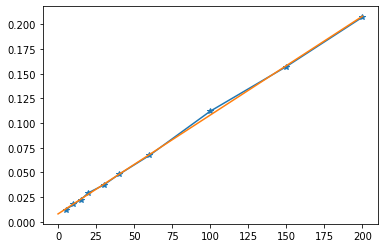

In [25]:
y=[mean(y[0])/20 for y in rs]
plot(x,y,'-*')
z=np.polyfit(x,y, 1)
plot([0,200],[z[1],z[0]*200+z[1]])
z

** Conclusion: integration time time unit 1 ms, dead time 8ms
## High priority

In [11]:
import psutil, os
p = psutil.Process(os.getpid())

In [17]:
rs1=[]
x=array((5,10,15,20,30,40,60,100,150,200))
p.nice(psutil.HIGH_PRIORITY_CLASS)
for i in x:
    print(f"timing for {i}")
    inst.integrationTime(i)
    res=repeat(stmt=inst.readSpectrumTTL,number=20)
    print(res)
    rs1.append(res)
rs1=array(rs1)    

timing for 5
[0.22922599461060145, 0.2241065074377957, 0.2252751476386834, 0.24541019129355846, 0.22654262100598999, 0.2201322805771042, 0.23225121052917075]
timing for 10
[0.3247200878233798, 0.32203140060767055, 0.3276914591494915, 0.32207249253349346, 0.3322792309717215, 0.3273361556873624, 0.34147744602341845]
timing for 15
[0.4241972639154028, 0.4284081235903159, 0.4360926679606223, 0.4270659054269572, 0.43539764762891764, 0.4218100355693082, 0.4265894516317985]
timing for 20
[0.5128651380706515, 0.5123266921460186, 0.5106072075946599, 0.5174582235039225, 0.514863764325014, 0.5397895597461115, 0.5179683301693672]
timing for 30
[0.7319230064836688, 0.718420412201624, 0.7887102767718375, 0.7251251266853842, 0.7395473299281434, 0.7386819198005696, 0.7522589046380403]
timing for 40
[0.9282251582481535, 0.9228385735576126, 0.9412311070129249, 0.9162050614625628, 0.9164501960545408, 0.9164392145916054, 0.9213206519871733]
timing for 60
[1.3154226853644104, 1.319586076780297, 1.321261635

array([0.00099917, 0.00628827])

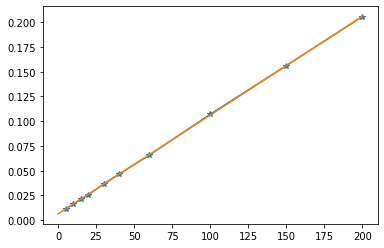

In [18]:
y=[mean(y[0])/20 for y in rs1]
plot(x,y,'-*')
z=np.polyfit(x,y, 1)
plot([0,200],[z[1],z[0]*200+z[1]])
z

Conclusion: integration time unit 0.9ms, dead time 7.7ms
## Test on USB 3 port

In [10]:
rs3=[]
x=array((5,10,15,20,30,40,60,100,150,200))
p.nice(psutil.HIGH_PRIORITY_CLASS)
for i in x:
    print(f"timing for {i}")
    inst.integrationTime(i)
    res=repeat(stmt=inst.readSpectrumTTL,number=20)
    print(res)
    rs3.append(res)
rs3=array(rs3)  

timing for 5
[0.22730353011524515, 0.22292794849623032, 0.2231443895882979, 0.22824049687223147, 0.22186593475806593, 0.2193129217457408, 0.21745634602802255]
timing for 10
[0.3244933737498401, 0.32938154171946343, 0.32871131823960775, 0.34206229748499695, 0.33652268079473213, 0.3332367436915926, 0.32810273264849155]
timing for 15
[0.4284715326827824, 0.42960226912448274, 0.42663125203909846, 0.4313833915646068, 0.4261229165773681, 0.4297999354573374, 0.43338166357827745]
timing for 20
[0.5395189198207966, 0.5268902374440252, 0.5267744007220836, 0.5281612532187197, 0.5254796508178181, 0.5234512683412582, 0.5261966340753386]
timing for 30
[0.7287550315469105, 0.7258116452392347, 0.7404028213149481, 0.72821658562229, 0.7689549791901289, 0.7359188420295304, 0.7350002957910178]
timing for 40
[0.9576763791211924, 0.9241722899432112, 0.9242335735912093, 0.9243455136650134, 0.9431277119342631, 0.9194995003434343, 0.920879622266014]
timing for 60
[1.3206502159628677, 1.3199374835942272, 1.3319

array([0.00099635, 0.0066758 ])

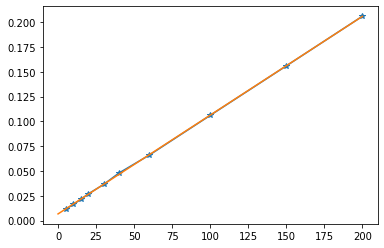

In [11]:
y=[mean(y[0])/20 for y in rs3]
plot(x,y,'-*')
z=np.polyfit(x,y, 1)
plot([0,200],[z[1],z[0]*200+z[1]])
z

In [10]:
import h5py

In [141]:
p.nice(psutil.REALTIME_PRIORITY_CLASS)
fname=r'd:\run300-directHdf-mini5-shuffle-2b.h5'
# read datas
n=300*1
delay=0.00
itime=15

res=np.zeros((2048,n))
volts=np.zeros(n)
ttlin=np.zeros(n)
tstamps=np.zeros((3,n),dtype='float64')

inst.integrationTime(itime)
def totime():
    #create file structure
    with h5py.File(fname, "w") as hf:
        g=hf.create_group('Scan')
        hspec=g.create_dataset("Spectrums", data=res,dtype='u2',chunks=True,shuffle=True,compression=2)
        httlin=g.create_dataset("TTLinput", data=ttlin,dtype='i1',chunks=True,shuffle=True,compression=2)
        htstamps=g.create_dataset("Timestamps", data=tstamps,dtype='float64',chunks=True,shuffle=True,compression=2)
        g.attrs["IntegrationTime(ms)"]=itime
        # start acquisition
        for i in range(n):
            tstamps[0,i]= time.time()
            res[:,i],ttlin[i]=inst.readSpectrumTTL()
            tstamps[1,i]= time.time()
            hspec[:,i]=res[:,i]
            httlin[i]=ttlin[i]
            if i%100==0:
                print('aquisition ',i,n)
            tstamps[2,i]= time.time()
            htstamps[:,i]=tstamps[:,i]
        g.attrs["Timestamps"]=[str(tstamp) for tstamp in tstamps]
    
p.nice(psutil.NORMAL_PRIORITY_CLASS)  

In [142]:
p.nice(psutil.REALTIME_PRIORITY_CLASS)
%prun totime()
p.nice(psutil.NORMAL_PRIORITY_CLASS)  

aquisition  0 300
aquisition  100 300
aquisition  200 300
 

In [143]:
mean(tstamps[1,:]-tstamps[0,:]),mean(tstamps[2,:]-tstamps[1,:])

(0.022645610173543294, 0.011504493554433186)

In [144]:
%timeit tstamps[2,i]= datetime.datetime.now().timestamp()

35 µs ± 3.38 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [99]:
%timeit tstamps[2,i]= time.time()

6.67 µs ± 1.59 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [15]:
np.savez(r'\\data\OPENDATA\Instrumentation\Chirality\MChD\MChD-python\run300-directHdf-long2',res=res,ttlin=ttlin,tstamps=tstamps)

In [39]:
fname=r'\\data\OPENDATA\Instrumentation\Chirality\MChD\MChD-python\run300-directHdf-3-2.h5'

def storeAllSpectrums(res,ttlin,tstamps):
    with h5py.File(fname, "w") as hf:
        g=hf.create_group('Scan')
        g.create_dataset("Spectrums", data=res,dtype='u2',compression="gzip")
        g.create_dataset("TTLinput", data=ttlin,dtype='i1',compression="gzip")
        g.attrs["Timestamps"]=[str(tstamp) for tstamp in tstamps]
        g.attrs["IntegrationTime"]=itime
        
storeAllSpectrums(res,ttlin,tstamps)

In [82]:
fname=r'\\data\OPENDATA\Instrumentation\Chirality\MChD\MChD-python\benchmark2.h5'

n=60000

res=np.zeros((2048,n))
volts=np.zeros(n)
ttlin=np.zeros(n)
tstamps=np.zeros((2,n),dtype='float64')

hf= h5py.File(fname, "w")
g=hf.create_group('Scan')
g.create_dataset("Spectrums", data=res,dtype='u2',compression="gzip")
g.create_dataset("TTLinput", data=ttlin,dtype='i1',compression="gzip")
htstamps=g.create_dataset("Timestamps", data=tstamps,dtype='float64',compression="gzip")
g.attrs["Timestamps"]=[str(tstamp) for tstamp in tstamps]
g.attrs["IntegrationTime"]=itime

hspec=g["Spectrums"]     




In [83]:
res=np.zeros((2048,n))
#res+=random.random(res.shape)
i=10
res,i

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 10)

In [92]:
p.nice(psutil.REALTIME_PRIORITY_CLASS)
%prun hspec[:,i]=res[:,i]

In [88]:
%load_ext line_profiler

ModuleNotFoundError: No module named 'line_profiler'

In [25]:
datas=np.load('run30000.npz')

In [29]:
inst.integrationTime(itime)
%timeit     res[:,i],ttlin[i]=inst.readSpectrumTTL()

22.7 ms ± 3.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


(0.0, numpy.timedelta64(92327000,'us'), 92327000.0)

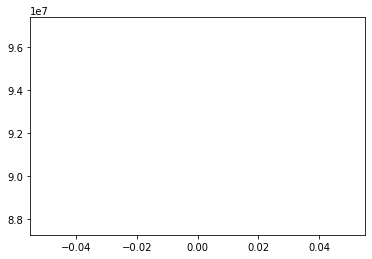

In [38]:
#time offset and jitter
delta=tstamps[1,:]-tstamps[0,:]
plot(delta)
np.std(delta.astype(int)),np.mean(delta),np.mean(delta.astype(int))

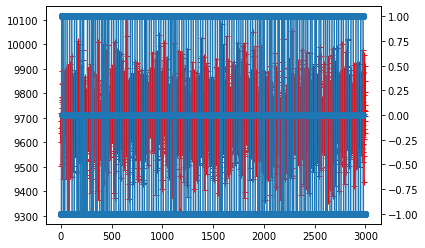

In [35]:
plot(res[840,:],'r-+')
plt.twinx()
plot(ttlin-1,'-o')

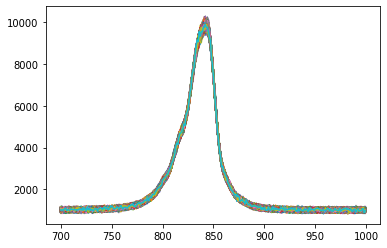

In [36]:
plot(np.arange(700,1000),res[700:1000,:]);

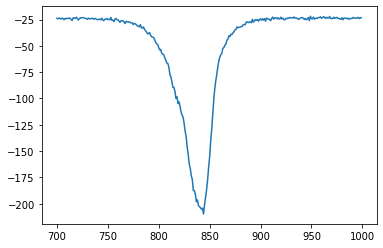

In [37]:
plot(np.arange(700,1000),mean(res*(ttlin-1),axis=1)[700:1000])

In [27]:
%timeit mean(res*(ttlin-1),axis=1)

5.25 ms ± 671 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
